In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
crime_df = pd.read_csv("Crime_Reports.csv")
crime_df.head()

,Incident Number,Highest Offense Description,Occurred Date,Occurred Time,Report Date,Report Time,Location Type,Address,Zip Code,Census Tract,Clearance Date,X-coordinate,Y-coordinate,Latitude,Longitude,Location
0,2.021365e+10,FAMILY DISTURBANCE,12/31/21,1301,12/31/21,1301,RESIDENCE / HOME,7119 VALLECITO DR,78759.0,327.0,NaN,3104383.0,3104383.0,30.420687,-97.770218,"(30.42068724, -97.77021801)"
1,2.021365e+10,ASSAULT W/INJURY-FAM/DATE VIOL,12/31/21,436,12/31/21,436,RESIDENCE / HOME,7608 SCENIC BROOK DR,78736.0,330.0,12/31/21,3066128.0,3066128.0,30.236409,-97.896279,"(30.23640862, -97.89627861)"
2,2.021802e+10,THEFT BY SHOPLIFTING,12/31/21,1502,12/31/21,1540,LIQUOR STORE,1000 E 41ST ST,78751.0,3.0,NaN,3121344.0,3121344.0,30.300464,-97.719652,"(30.30046387, -97.71965158)"
3,2.021365e+10,ASSAULT W/INJURY-FAM/DATE VIOL,12/31/21,1223,12/31/21,1223,RESIDENCE / HOME,8225 N FM 620 RD,78726.0,346.0,12/31/21,3081086.0,3081086.0,30.420047,-97.844167,"(30.42004712, -97.84416748)"
4,2.021802e+10,MAIL THEFT,12/31/21,1345,12/31/21,1354,RESIDENCE / HOME,600 E 53RD ST,78751.0,15.0,NaN,3122091.0,3122091.0,30.315941,-97.716864,"(30.31594103, -97.71686429)"


In [2]:
# Rename Column
crime_df.rename(columns = {'Highest Offense Description':'Highest_Offense_Description'}, inplace = True)
crime_df.rename(columns = {'Zip Code':'Zip_Code'}, inplace = True)

In [3]:
crime_df.head()

,Incident Number,Highest_Offense_Description,Occurred Date,Occurred Time,Report Date,Report Time,Location Type,Address,Zip_Code,Census Tract,Clearance Date,X-coordinate,Y-coordinate,Latitude,Longitude,Location
0,2.021365e+10,FAMILY DISTURBANCE,12/31/21,1301,12/31/21,1301,RESIDENCE / HOME,7119 VALLECITO DR,78759.0,327.0,NaN,3104383.0,3104383.0,30.420687,-97.770218,"(30.42068724, -97.77021801)"
1,2.021365e+10,ASSAULT W/INJURY-FAM/DATE VIOL,12/31/21,436,12/31/21,436,RESIDENCE / HOME,7608 SCENIC BROOK DR,78736.0,330.0,12/31/21,3066128.0,3066128.0,30.236409,-97.896279,"(30.23640862, -97.89627861)"
2,2.021802e+10,THEFT BY SHOPLIFTING,12/31/21,1502,12/31/21,1540,LIQUOR STORE,1000 E 41ST ST,78751.0,3.0,NaN,3121344.0,3121344.0,30.300464,-97.719652,"(30.30046387, -97.71965158)"
3,2.021365e+10,ASSAULT W/INJURY-FAM/DATE VIOL,12/31/21,1223,12/31/21,1223,RESIDENCE / HOME,8225 N FM 620 RD,78726.0,346.0,12/31/21,3081086.0,3081086.0,30.420047,-97.844167,"(30.42004712, -97.84416748)"
4,2.021802e+10,MAIL THEFT,12/31/21,1345,12/31/21,1354,RESIDENCE / HOME,600 E 53RD ST,78751.0,15.0,NaN,3122091.0,3122091.0,30.315941,-97.716864,"(30.31594103, -97.71686429)"


In [4]:
# Drop the non-beneficial ID columns.
crime_df = crime_df.dropna()

In [5]:
# Remove columns
crime_df = crime_df.drop(columns = ["Location Type", "Address", "Location"])
print(crime_df.shape)
crime_df.head(10)

(43920, 13)


,Incident Number,Highest_Offense_Description,Occurred Date,Occurred Time,Report Date,Report Time,Zip_Code,Census Tract,Clearance Date,X-coordinate,Y-coordinate,Latitude,Longitude
1,2.021365e+10,ASSAULT W/INJURY-FAM/DATE VIOL,12/31/21,436,12/31/21,436,78736.0,330.00,12/31/21,3066128.0,3066128.0,30.236409,-97.896279
3,2.021365e+10,ASSAULT W/INJURY-FAM/DATE VIOL,12/31/21,1223,12/31/21,1223,78726.0,346.00,12/31/21,3081086.0,3081086.0,30.420047,-97.844167
5,2.021365e+10,AGG ASLT STRANGLE/SUFFOCATE,12/31/21,244,12/31/21,244,78752.0,433.00,12/31/21,3128894.0,3128894.0,30.333886,-97.694807
6,2.021365e+10,FAMILY DISTURBANCE,12/31/21,1933,12/31/21,1933,78702.0,8.00,1/1/22,3119243.0,3119243.0,30.274018,-97.727025
7,2.021365e+10,TERRORISTIC THREAT,12/31/21,1621,12/31/21,1621,78741.0,23.15,12/31/21,3118423.0,3118423.0,30.233644,-97.730712
8,2.021365e+10,THEFT,12/31/21,331,12/31/21,331,78748.0,24.23,12/31/21,3092495.0,3092495.0,30.183169,-97.814152
13,2.021365e+10,POSS CONTROLLED SUB/NARCOTIC,12/31/21,2253,12/31/21,2357,78744.0,24.11,1/1/22,3111415.0,3111415.0,30.198729,-97.753842
16,2.021365e+10,FAILURE TO IDENTIFY,12/31/21,255,12/31/21,255,78660.0,442.00,12/31/21,3136138.0,3136138.0,30.432034,-97.669128
19,2.021365e+10,ASSAULT W/INJURY-FAM/DATE VIOL,12/31/21,2017,12/31/21,2017,78660.0,449.00,1/4/22,3152723.0,3152723.0,30.392256,-97.617609
20,2.021365e+10,CRIMINAL MISCHIEF,12/31/21,2300,12/31/21,2300,78702.0,9.00,1/3/22,3126442.0,3126442.0,30.258706,-97.704630


In [6]:
# Determine the number of unique values in each column.
crime_df.nunique()

Incident Number                43916
Highest_Offense_Description      238
Occurred Date                    365
Occurred Time                   1440
Report Date                      426
Report Time                     1440
Zip_Code                          52
Census Tract                     218
Clearance Date                   431
X-coordinate                   15024
Y-coordinate                   15024
Latitude                       17298
Longitude                      17288
dtype: int64

In [7]:
# Look at Highest Offense Description value counts for binning
crime_type_counts = crime_df['Highest_Offense_Description'].value_counts()
crime_type_counts

FAMILY DISTURBANCE                3812
THEFT                             3387
ASSAULT W/INJURY-FAM/DATE VIOL    2302
CRIMINAL MISCHIEF                 2226
BURGLARY OF VEHICLE               1990
                                  ... 
DOC WINDOW PEEPING - HOTEL           1
DEL MARIJUANA                        1
UNLAWFUL CARRY-LIC HOLDER            1
LIQUOR LAW VIOLATION/OTHER           1
FRAUD DESTRUCTION OF A WRITING       1
Name: Highest_Offense_Description, Length: 238, dtype: int64

<AxesSubplot:ylabel='Density'>

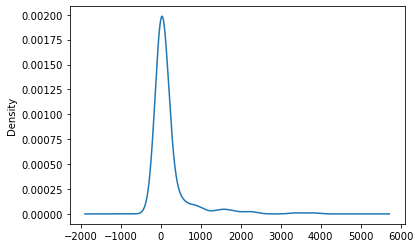

In [8]:
# Visualize the value counts of Highest Offense Description
crime_type_counts.plot.density()

In [9]:
 # Determine which values to replace if counts are less than ...?
replace_crime = list(crime_type_counts[crime_type_counts < 10].index)

# Replace in dataframe
for crm in replace_crime:
    crime_df.Highest_Offense_Description = crime_df.Highest_Offense_Description.replace(crm,"Other")
    
# Check to make sure binning was successful
crime_df.Highest_Offense_Description.value_counts()


FAMILY DISTURBANCE                3812
THEFT                             3387
ASSAULT W/INJURY-FAM/DATE VIOL    2302
CRIMINAL MISCHIEF                 2226
BURGLARY OF VEHICLE               1990
                                  ... 
DAMAGE CITY VEHICLE                 11
INTERFERING W/EMERG PHONE CALL      11
DOC WINDOW PEEPING-RESIDENCE        11
CRIMINAL TRESPASS/IN VEHICLE        10
THEFT BY CHECK                      10
Name: Highest_Offense_Description, Length: 125, dtype: int64

In [10]:
# Look at zip code counts for binning
zip_code_counts = crime_df['Zip_Code'].value_counts()
zip_code_counts

78741.0    3855
78758.0    3297
78753.0    3261
78704.0    2925
78745.0    2805
78744.0    2450
78723.0    2255
78702.0    1912
78759.0    1667
78748.0    1639
78752.0    1345
78701.0    1307
78757.0    1040
78751.0     961
78727.0     909
78754.0     897
78721.0     888
78705.0     846
78749.0     820
78724.0     785
78729.0     735
78731.0     718
78750.0     702
78746.0     696
78703.0     584
78617.0     518
78717.0     502
78735.0     498
78747.0     469
78726.0     420
78660.0     385
78756.0     385
78722.0     383
78613.0     262
78739.0     171
78730.0     154
78736.0     148
78719.0      75
78725.0      72
78742.0      58
78653.0      56
78728.0      23
78652.0      15
78737.0       8
78712.0       7
78732.0       4
78665.0       2
78734.0       2
78733.0       1
78681.0       1
78738.0       1
78664.0       1
Name: Zip_Code, dtype: int64

<AxesSubplot:ylabel='Density'>

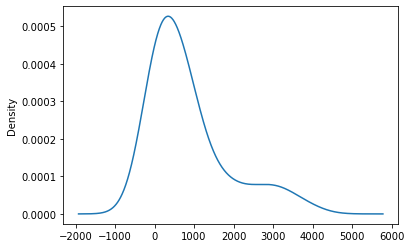

In [11]:
# Visualize the value counts of zip code
zip_code_counts.plot.density()

In [12]:
# Determine which values to replace if counts are less than ..?
replace_zip = list(zip_code_counts[zip_code_counts < 100].index)

# Replace in dataframe
for zpc in replace_zip:
    crime_df.Zip_Code = crime_df.Zip_Code.replace(zpc,"Other")
    
# Check to make sure binning was successful
crime_df.Zip_Code.value_counts()

78741.0    3855
78758.0    3297
78753.0    3261
78704.0    2925
78745.0    2805
78744.0    2450
78723.0    2255
78702.0    1912
78759.0    1667
78748.0    1639
78752.0    1345
78701.0    1307
78757.0    1040
78751.0     961
78727.0     909
78754.0     897
78721.0     888
78705.0     846
78749.0     820
78724.0     785
78729.0     735
78731.0     718
78750.0     702
78746.0     696
78703.0     584
78617.0     518
78717.0     502
78735.0     498
78747.0     469
78726.0     420
78660.0     385
78756.0     385
78722.0     383
Other       326
78613.0     262
78739.0     171
78730.0     154
78736.0     148
Name: Zip_Code, dtype: int64

In [13]:
# Convert to strings
crime_df['Zip_Code'] = crime_df['Zip_Code'].astype(str)

In [14]:
# Generate our categorical variable lists
crime_cat = crime_df.dtypes[crime_df.dtypes == "object"].index.tolist()
crime_cat

['Highest_Offense_Description',
 'Occurred Date',
 'Report Date',
 'Zip_Code',
 'Clearance Date']

In [15]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(crime_df[crime_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(crime_cat)
encode_df.head()


/Users/dianakarajeh/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Highest_Offense_Description_ABUSE OF 911,Highest_Offense_Description_AGG ASLT ENHANC STRANGL/SUFFOC,Highest_Offense_Description_AGG ASLT STRANGLE/SUFFOCATE,Highest_Offense_Description_AGG ASSAULT,Highest_Offense_Description_AGG ASSAULT FAM/DATE VIOLENCE,Highest_Offense_Description_AGG ROBBERY/DEADLY WEAPON,Highest_Offense_Description_ARSON,Highest_Offense_Description_ASSAULT BY CONTACT,Highest_Offense_Description_ASSAULT BY CONTACT FAM/DATING,Highest_Offense_Description_ASSAULT BY THREAT,...,Clearance Date_9/28/21,Clearance Date_9/29/21,Clearance Date_9/3/21,Clearance Date_9/30/21,Clearance Date_9/4/21,Clearance Date_9/5/21,Clearance Date_9/6/21,Clearance Date_9/7/21,Clearance Date_9/8/21,Clearance Date_9/9/21
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
# Merge one-hot encoded features and drop the originals
crime_df = crime_df.merge(encode_df, left_index=True,right_index=True)
crime_df = crime_df.drop(columns = crime_cat)
crime_df.head()

,Incident Number,Occurred Time,Report Time,Census Tract,X-coordinate,Y-coordinate,Latitude,Longitude,Highest_Offense_Description_ABUSE OF 911,Highest_Offense_Description_AGG ASLT ENHANC STRANGL/SUFFOC,...,Clearance Date_9/28/21,Clearance Date_9/29/21,Clearance Date_9/3/21,Clearance Date_9/30/21,Clearance Date_9/4/21,Clearance Date_9/5/21,Clearance Date_9/6/21,Clearance Date_9/7/21,Clearance Date_9/8/21,Clearance Date_9/9/21
1,2.021365e+10,436,436,330.00,3066128.0,3066128.0,30.236409,-97.896279,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.021365e+10,1223,1223,346.00,3081086.0,3081086.0,30.420047,-97.844167,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2.021365e+10,244,244,433.00,3128894.0,3128894.0,30.333886,-97.694807,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2.021365e+10,1933,1933,8.00,3119243.0,3119243.0,30.274018,-97.727025,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,2.021365e+10,1621,1621,23.15,3118423.0,3118423.0,30.233644,-97.730712,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
# Export table
crime_df.to_csv('crime_updated.csv')

In [18]:
# Split our preprocessed data into our features and target arrays
y = crime_df['Highest_Offense_Description_FAMILY DISTURBANCE'].values
X = crime_df.drop(['Highest_Offense_Description_FAMILY DISTURBANCE'],1).values
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

/Users/dianakarajeh/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [19]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [20]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  YOUR CODE GOES HERE

number_input_features = len(X_train[0])
hidden_nodes_layer1 = 80
hidden_nodes_layer2 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 80)                111440    
_________________________________________________________________
dense_1 (Dense)              (None, 30)                2430      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 113,901
Trainable params: 113,901
Non-trainable params: 0
_________________________________________________________________


2022-07-07 20:34:31.862025: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-07-07 20:34:31.862642: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 10. Tune using inter_op_parallelism_threads for best performance.


In [21]:
 # Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"


In [22]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [23]:
# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=1000)

In [24]:
# Train the model
fit_model = nn.fit(X_train, y_train,epochs=30)

Train on 26275 samples
Epoch 1/30
26275/26275 [==============================] - 8s 304us/sample - loss: 5084861.9351 - accuracy: 0.8398
Epoch 2/30
26275/26275 [==============================] - 6s 244us/sample - loss: 3566153.0553 - accuracy: 0.8411
Epoch 3/30
26275/26275 [==============================] - 9s 326us/sample - loss: 2564583.0483 - accuracy: 0.8404
Epoch 4/30
26275/26275 [==============================] - 6s 240us/sample - loss: 1780367.0181 - accuracy: 0.8394
Epoch 5/30
26275/26275 [==============================] - 6s 220us/sample - loss: 1420485.2331 - accuracy: 0.8403
Epoch 6/30
26275/26275 [==============================] - 6s 221us/sample - loss: 1069688.5533 - accuracy: 0.8397
Epoch 7/30
26275/26275 [==============================] - 7s 254us/sample - loss: 477442.6216 - accuracy: 0.8400
Epoch 8/30
26275/26275 [==============================] - 6s 240us/sample - loss: 16057.7390 - accuracy: 0.8373
Epoch 9/30
26275/26275 [==============================] - 6s 211us/s

In [25]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8759/1 - 1s - loss: 0.3773 - accuracy: 0.9117
Loss: 0.36588028222679725, Accuracy: 0.911747932434082


In [26]:
# Export our model to HDF5 file
nn.save("Crime_Reports_A1.h5")

In [27]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  YOUR CODE GOES HERE

number_input_features = len(X_train[0])
hidden_nodes_layer1 = 100
hidden_nodes_layer2 = 50
hidden_nodes_layer3 = 20

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))


# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 100)               139300    
_________________________________________________________________
dense_4 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_5 (Dense)              (None, 20)                1020      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 21        
Total params: 145,391
Trainable params: 145,391
Non-trainable params: 0
_________________________________________________________________


In [28]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"


In [29]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [30]:
# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=1000)

In [31]:
# Train the model
fit_model = nn.fit(X_train, y_train,epochs=30)

Train on 26275 samples
Epoch 1/30
26275/26275 [==============================] - 9s 360us/sample - loss: 6277789.3789 - accuracy: 0.8390
Epoch 2/30
26275/26275 [==============================] - 8s 322us/sample - loss: 1716842.5679 - accuracy: 0.8369
Epoch 3/30
26275/26275 [==============================] - 8s 309us/sample - loss: 538814.7457 - accuracy: 0.8402
Epoch 4/30
26275/26275 [==============================] - 8s 308us/sample - loss: 291220.7660 - accuracy: 0.8412
Epoch 5/30
26275/26275 [==============================] - 9s 325us/sample - loss: 87178.6481 - accuracy: 0.8405
Epoch 6/30
26275/26275 [==============================] - 9s 341us/sample - loss: 294530.8511 - accuracy: 0.8340
Epoch 7/30
26275/26275 [==============================] - 8s 322us/sample - loss: 388742.2955 - accuracy: 0.8399
Epoch 8/30
26275/26275 [==============================] - 8s 317us/sample - loss: 12353.6164 - accuracy: 0.8399
Epoch 9/30
26275/26275 [==============================] - 9s 345us/sample

In [32]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8759/1 - 1s - loss: 0.2994 - accuracy: 0.9148
Loss: 0.30033397913074394, Accuracy: 0.9148304462432861


In [33]:
# Export our model to HDF5 file
nn.save("Crime_Reports_A2.h5")

In [34]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  YOUR CODE GOES HERE

number_input_features = len(X_train[0])
hidden_nodes_layer1 = 100
hidden_nodes_layer2 = 50
hidden_nodes_layer3 = 20

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))


# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="tanh"))

# Check the structure of the model
nn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 100)               139300    
_________________________________________________________________
dense_8 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_9 (Dense)              (None, 20)                1020      
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 21        
Total params: 145,391
Trainable params: 145,391
Non-trainable params: 0
_________________________________________________________________


In [35]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [36]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [37]:
# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=1000)

In [38]:
# Train the model
fit_model = nn.fit(X_train, y_train,epochs=30)

Train on 26275 samples
Epoch 1/30
26275/26275 [==============================] - 9s 336us/sample - loss: 1.3538 - accuracy: 0.9122
Epoch 2/30
26275/26275 [==============================] - 8s 296us/sample - loss: 1.3538 - accuracy: 0.9122
Epoch 3/30
26275/26275 [==============================] - 8s 291us/sample - loss: 1.3538 - accuracy: 0.9122
Epoch 4/30
26275/26275 [==============================] - 8s 290us/sample - loss: 1.3538 - accuracy: 0.9122
Epoch 5/30
26275/26275 [==============================] - 8s 298us/sample - loss: 1.3538 - accuracy: 0.9122
Epoch 6/30
26275/26275 [==============================] - 8s 298us/sample - loss: 1.3538 - accuracy: 0.9122
Epoch 7/30
26275/26275 [==============================] - 8s 298us/sample - loss: 1.3538 - accuracy: 0.9122
Epoch 8/30
26275/26275 [==============================] - 9s 349us/sample - loss: 1.3538 - accuracy: 0.9122
Epoch 9/30
26275/26275 [==============================] - 9s 343us/sample - loss: 1.3538 - accuracy: 0.9122
Epoch

In [39]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8759/1 - 2s - loss: 1.2207 - accuracy: 0.7813
Loss: 0.9342269107677278, Accuracy: 0.7812535762786865


In [40]:
# Export our model to HDF5 file
nn.save("CrimeReports_Optimization.h5")